# Makine Öğrenmesi Alıştırmaları

Bu öğreticide, denetimsiz/öngörüsüz modellemeye örnek olan 'boyut düşürme' analizi ve denetimli/öngörülü modellemeye bir örnek olan 'sınıflandırma' için İris veri seti kullanılacaktır. Veri kümesinin son kolonu olan bitki türleri ('Species'), hedef değişken (bu örnekte tahmin etmek istediğiniz değişken) olacaktır.

Bu öğreticinin farklı bölümlerinde DataCamp’in 'R ile Makine Öğrenmesi' eğiticisi ve Laurent Gatto’nun 'R ile Makine Öğrenmesine Giriş' eğiticisinden parçalar kullanılmıştır.

Önce gerekli paketleri yükleyelim (bu paketleri Jupyter yerine komut satırından veya R studio'dan yüklemek daha iyi bir seçenek olacaktır):

In [4]:
library(lattice)
library(ggplot2)
library(caret)
library(DT)
library(ggvis)
library(class)
library(gmodels)
library(kernlab)
library(e1071)

Şimdi iris verisetini yükleyelim ve görüntüleyelim:

In [9]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Verisetini düzenli ve satır sırası istenilen ölçüte göre değiştirilebilir bir şekilde görüntülemek için datatable komutu kullanılabilir:

In [8]:
datatable(iris)

HTML widgets cannot be represented in plain text (need html)

Histogram veya kutu grafikler gibi figürler oluşturarak veriniz hakkında fikir edinmek mümkündür. Bununla birlikte, dağılım grafikleri veri yapısı ilgili fikir verebilir. Başka bir deyişle, iki değişken arasında herhangi bir korelasyon olup olmadığını görmek mümkündür. Örneğin, ggvis paketi ile dağılım grafikleri oluşturabilirsiniz:

In [36]:
iris %>% ggvis(~Sepal.Length, ~Sepal.Width, fill = ~Species) %>% layer_points()

In [37]:
iris %>% ggvis(~Petal.Length, ~Petal.Width, fill = ~Species) %>% layer_points()

Bu grafikte Iris veri setine dahil edilen tüm farklı türler için taç yaprağı uzunluğu ile taç yaprağı genişliği arasında pozitif bir korelasyon olduüunu görmekteyiz. Bundan emin olmak için bu hipotezi istatistiki olarak test etmeniz gereklidir:

In [38]:
# Overall correlation `Petal.Length` and `Petal.Width`
cor(iris$Petal.Length, iris$Petal.Width)

# Return values of `iris` levels 
yy=levels(iris$Species)

# Print Setosa correlation matrix
print(yy[1])
cor(iris[iris$Species==yy[1],1:4])

# Print Versicolor correlation matrix
print(yy[2])
cor(iris[iris$Species==yy[2],1:4])

# Print Virginica correlation matrix
print(yy[3])
cor(iris[iris$Species==yy[3],1:4])

[1] 0.9628654

[1] "setosa"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.7425467,0.2671758,0.2780984
Sepal.Width,0.7425467,1.0000000,0.1777000,0.2327520
Petal.Length,0.2671758,0.1777000,1.0000000,0.3316300
Petal.Width,0.2780984,0.2327520,0.3316300,1.0000000


[1] "versicolor"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.5259107,0.7540490,0.5464611
Sepal.Width,0.5259107,1.0000000,0.5605221,0.6639987
Petal.Length,0.7540490,0.5605221,1.0000000,0.7866681
Petal.Width,0.5464611,0.6639987,0.7866681,1.0000000


[1] "virginica"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.4572278,0.8642247,0.2811077
Sepal.Width,0.4572278,1.0000000,0.4010446,0.5377280
Petal.Length,0.8642247,0.4010446,1.0000000,0.3221082
Petal.Width,0.2811077,0.5377280,0.3221082,1.0000000


Verilerinizi Derinlemesine Anlamak

R, summary() işleviyle daha derinlemesine bir inceleme fırsatı verir. Bu fonksiyon, sayısal veri türleri için Iris veri kümesinin minimum değerini, ilk kantil ('quantile'), medyan, ortalama, üçüncü kantil ve maksimum değerini verecektir:

In [39]:
# Summary overview of `iris`
summary(iris) 

# Refined summary overview
summary(iris[c("Petal.Width", "Sepal.Width")])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

  Petal.Width     Sepal.Width   
 Min.   :0.100   Min.   :2.000  
 1st Qu.:0.300   1st Qu.:2.800  
 Median :1.300   Median :3.000  
 Mean   :1.199   Mean   :3.057  
 3rd Qu.:1.800   3rd Qu.:3.300  
 Max.   :2.500   Max.   :4.400  

Sadece bazı özellikleri kullanarak, örneğin uzunluk ('Length') bilgisini içeren, yeni değişkenler tanımlamak için grep fonksiyonu kullanılabilir.

In [14]:
names(iris)
i <- grep("Length", names(iris))
i

[1] 1 3

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [12]:
x <- iris[, i]
x

Sepal.Length,Petal.Length
<dbl>,<dbl>
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7
4.6,1.4
5.0,1.5
4.4,1.4


# Denetimsiz Öğrenme ('Unpuservised Learning')

Denetimsiz/Gözetimsiz öğrenmede (UML) hiçbir etiket bilgisi sağlanmaz ve öğrenme algoritması yalnızca etiketlenmemiş girdi verilerindeki yapıyı algılamaya odaklanır. Genellikle:

1) Kümeleme ('clustering'): Hedef veriler içindeki homojen alt grupları bulmaktır; gruplama gözlemler arasındaki mesafeye dayanır.

2) Boyutsal azalma ('dimensionality reduction'): Hedef, verinin örüntüleri tanımlamaktır, genellikle denetimli öğrenmeden önce verilerin görselleştirilmesi için ve bir veri ön işleme yöntemi olarak kullanılır.

UML belirli zorluklar ve faydalar sunar:

1) UML'de tek bir hedef yoktur,
2) genellikle etiketli verilere kıyasla çok daha fazla miktarda etiketlenmemiş veri mevcuttur.

## k-means clustering 

k-means algoritması, n gözlemin sabit sayıda k kümeye bölünmesini amaçlamaktadır. Algoritma homojen kümeler oluşturur.

1) k-ortalamaları öğrenmek için, iris veri kümesini sadece sepal ve petal uzunluk değişkenleriyle birlikte kullanalım (görselleştirmeyi kolaylaştırmak için). Böyle bir veri matrisi oluşturun ve x olarak adlandırın

2) Yeni oluşturulan x matrisi üzerinde k-means algoritmasını çalıştırın, sonuçları yeni bir değişken cl'ye kaydedin ve yazdırıldığında çıktısını keşfedin.

3) Algoritmaların gerçek sonuçlarına, yani küme üyeliğine, kümeleme sonucu çıktısının kümeler öğesinden erişilebilir.

In [16]:
cl <- kmeans(x, 3, nstart = 10)
cl

K-means clustering with 3 clusters of sizes 58, 41, 51

Cluster means:
  Sepal.Length Petal.Length
1     5.874138     4.393103
2     6.839024     5.678049
3     5.007843     1.492157

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 23.508448 20.407805  9.893725
 (between_SS / total_SS =  90.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

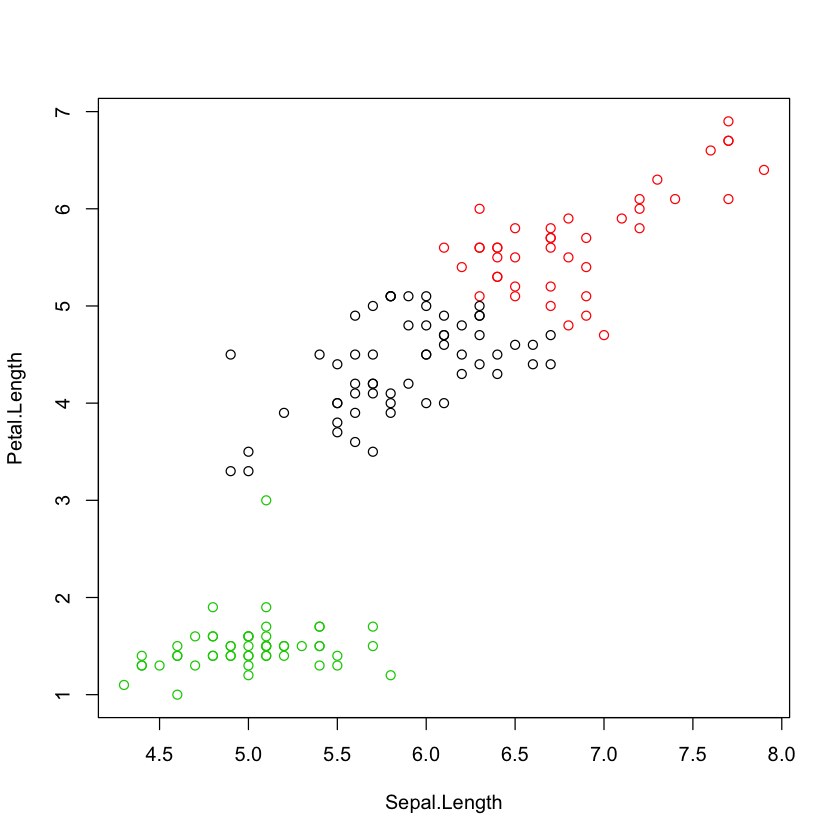

In [64]:
plot(x, col = cl$cluster)

Küme sayısı nasıl belirlenir?

1) K-means'i k = 1, k = 2,…, k = n ile çalıştırın

2) Her k değeri için SS hesaplayın.

3) Aşağıda gösterildiği gibi dirsek konumundaki k seçin.

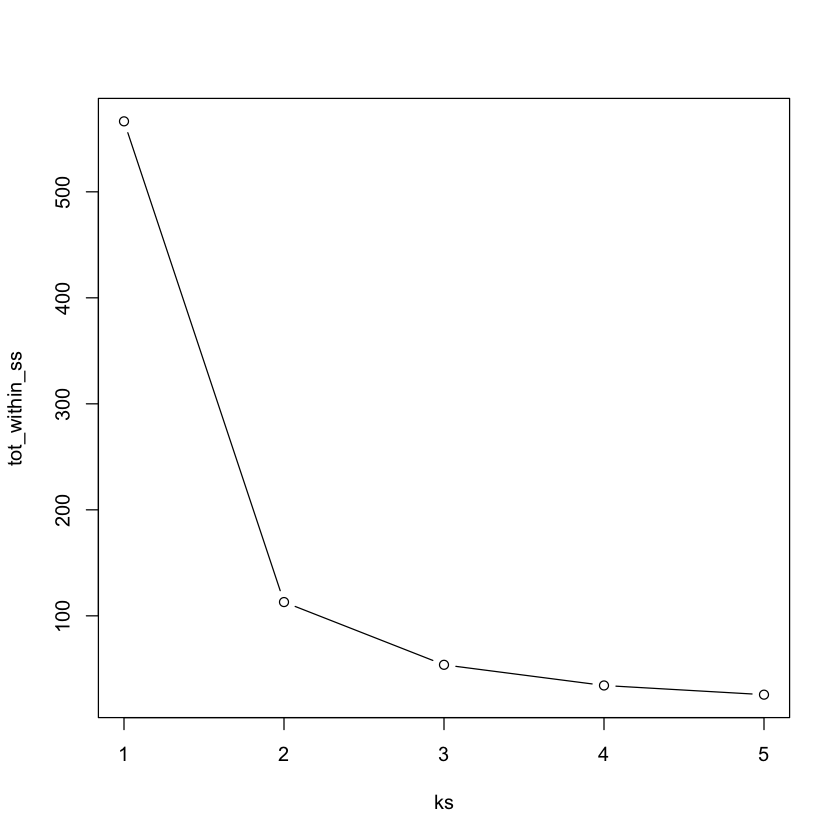

In [18]:
ks <- 1:5
tot_within_ss <- sapply(ks, function(k) {
    cl <- kmeans(x, k, nstart = 10)
    cl$tot.withinss
})
plot(ks, tot_within_ss, type = "b")

## Hiyerarşik Kümeleme (Hierarchical clustering)

Başlatma:

1) n noktasının her birini kendi kümesini atayarak başlar

İterasyon:

2) En yakın iki kümeyi bulun ve bir araya gelerek n-1 kümele elde edin.

3) Tümü tek bir kümede gruplanana kadar küme birleştirme işlemine devam edin.

Bitirme:

4) Tüm gözlemler tek bir kümede gruplanır.

Mesafeyi tipik olarak Öklid mesafesi kullanarak hesaplamak için dist() fonksiyonunu kullanınız,

Hclust() fonksiyonu kullanarak uzaklık matrisi üzerinde hiyerarşik kümeleme yapınız,

İris verilerine hiyerarşik kümeleme uygulayın ve belirtilen çizim yöntemini kullanarak bir dendrogram oluşturunuz.


Call:
hclust(d = d)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 150 


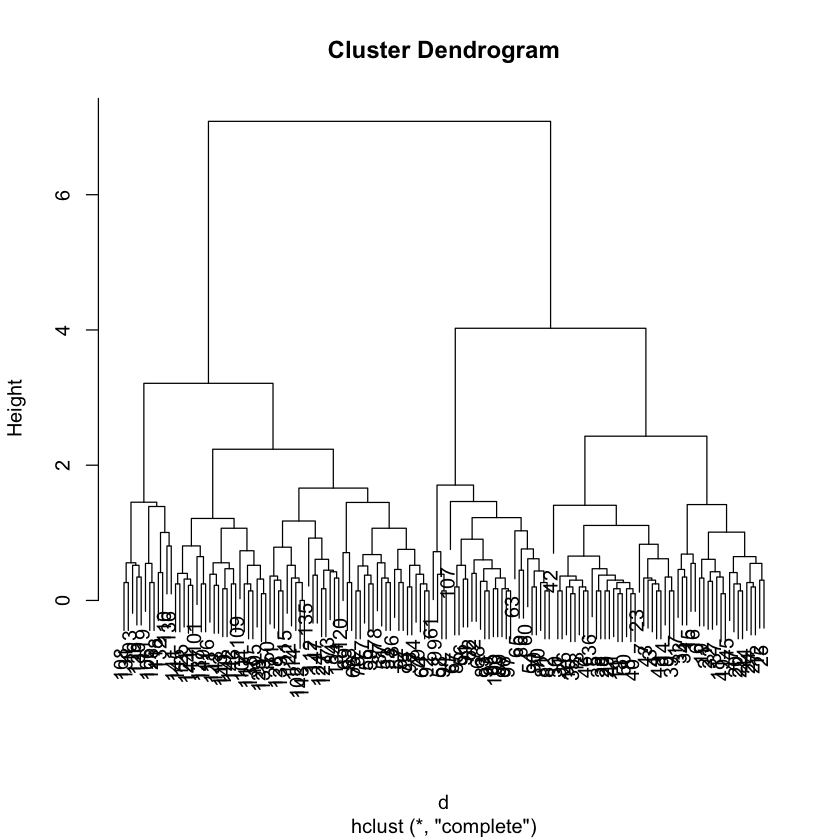

In [21]:
d <- dist(iris[, 1:4])
hcl <- hclust(d)
hcl
plot(hcl)

Kümeleri tanımlama

Hiyerarşik kümeleme sonucunu ürettikten sonra, kümeleri tanımlamak için ağacı (dendrogramı) belirli bir yükseklikten kesmemiz gerekir. Örneğin, test veri kümemizde 2 küme oluşturacak şekilde 1.5 civarında bir mesafeye kesmeye karar verebiliriz.

Bunun için R'da cutree() fonksiyonunu kullanabiliriz: cutree(hcl, k = 3)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

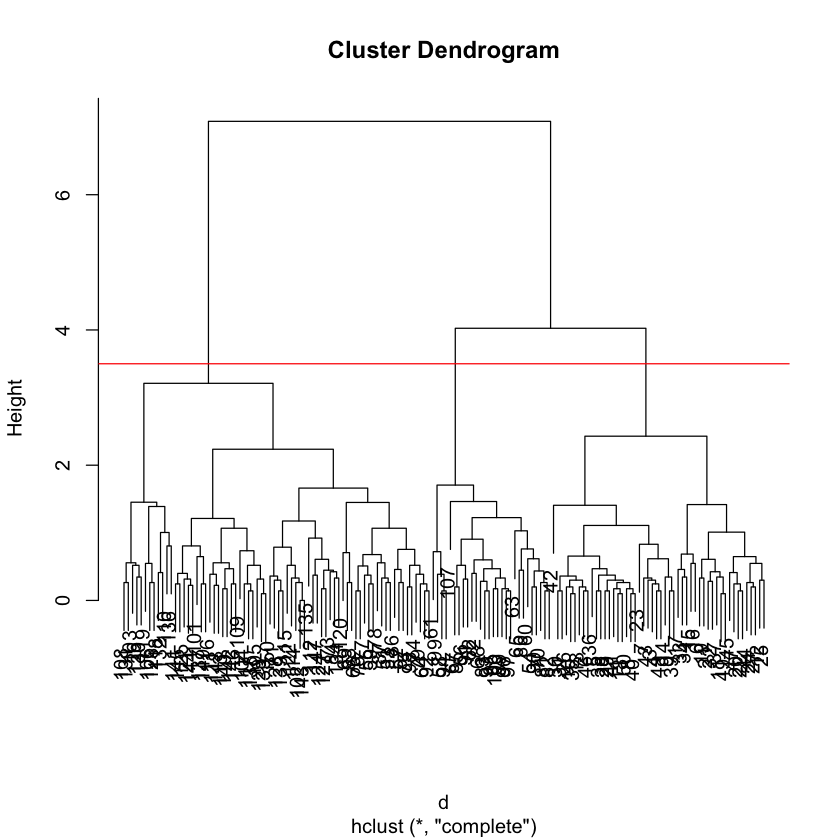

In [24]:
plot(hcl)
abline(h = 3.5, col = "red")

cutree(hcl, k = 3)

## Temel bileşenler Analizi (Principal component analysis - PCA)

Boyutsal küçültme için yaygın olarak uygulanır ve genellikle aşağıdakileri gerçekleştirmek için kullanılır:

1) özellikler içerisinde bir yapı bulmak,

2) diğer ML algoritmalarını uygulamadan önce veri üzerinde bir ön işleme gerçekleştirmek,

3) veri görselleştirme.

Boyutsal küçültme tekniklerinin temel ilkesi, verileri, tüm veri kümesinin özelliklerini özetleyen daha düşük sayıda boyuta sahip yeni bir alana dönüştürmektir.

In [26]:
irispca <- prcomp(iris[, -5])
summary(irispca)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

Bir biplot, ilk iki PC boyunca yeniden eşlenen (döndürülen) tüm orijinal noktaları ve aynı PC'ler boyunca vektörler gibi orijinal özellikleri içerir. PC alanında aynı yönde olan özellik vektörleri de orijinal veri alanında ilişkilidir.

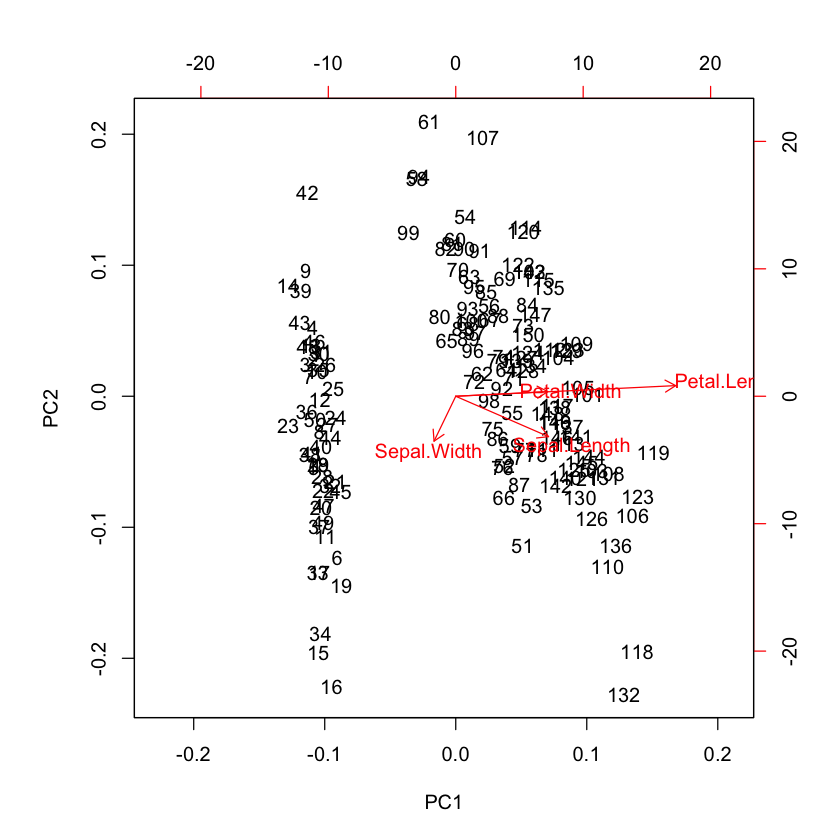

In [27]:
biplot(irispca)

Prcomp nesnesinde x olarak erişilebilen PCA alanındaki veri koordinatlarını kullanarak farklı figürler üretmek genellikle yararlıdır. Aşağıdaki PCA grafiklerini sırasıyla PC1 ve 2, ve PC3 ve 4 boyunca çoğaltın.

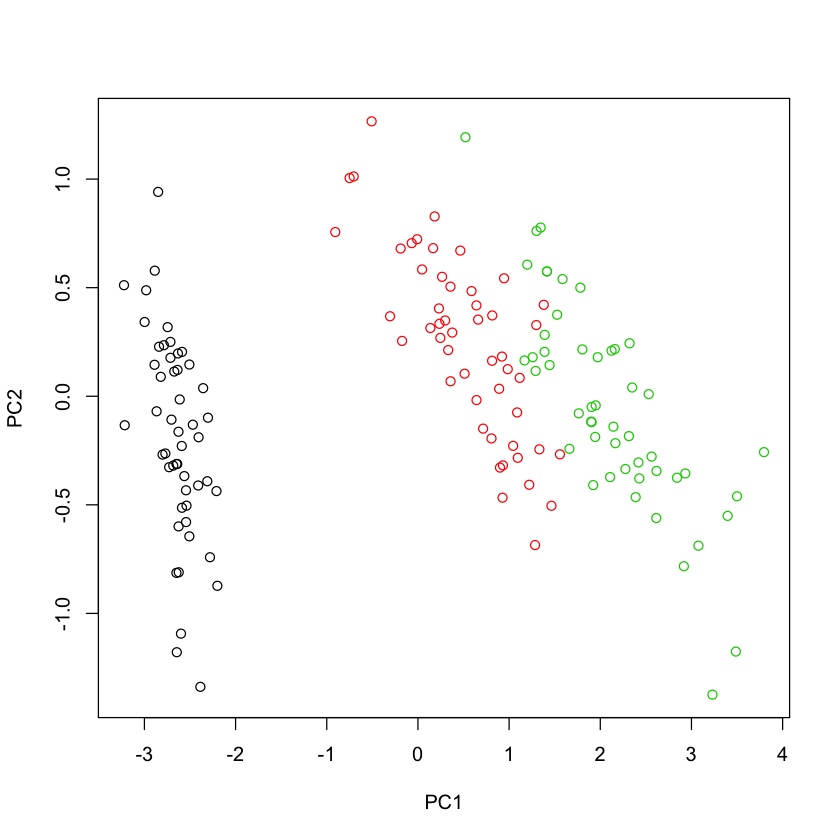

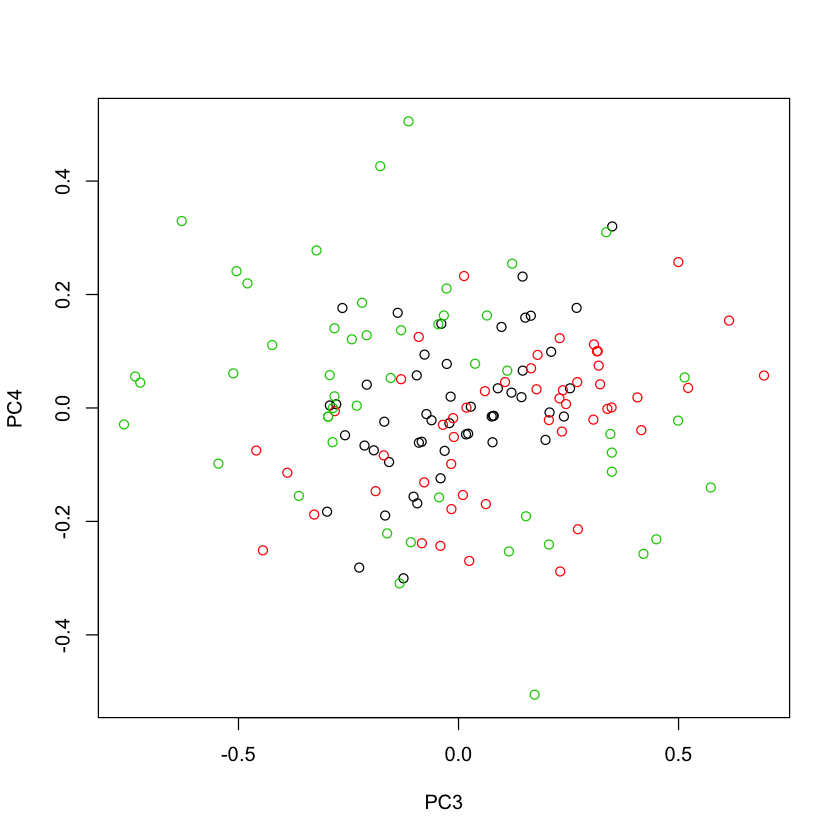

In [33]:
plot(irispca$x[, 1:2], col = iris$Species)
plot(irispca$x[, 3:4], col = iris$Species)

# Denetimli/Güdümlü Öğrenme (Supervised Learning)

Denetimli öğrenmede (SML), öğrenme algoritması etiketli örneklerle eğitilir. Etiketler istenen çıktıyı belirtir. SML'nin kendisi, çıktının nitel olduğu sınıflandırma ve çıktının nicel olduğu regresyondan oluşur.

İki etiket kümesi veya sınıf mevcut olduğunda buna ikili ('binary') sınıflandırma denir. Bunun klasik bir örneği, bir e-postayı spam olarak veya spam değil şeklinde etiketlemektir. Daha fazla sınıf öğrenilecekse (setosa, versicolor veya virginica türlerinden  birinden olabilecek yeni bir Iris örneğinin tahminlenmesi gibi) bu bir çoklu sınıf ('multi-class') sınıflama sorunudur. Her örneğe birden fazla etiket atanabiliyorsa, buna çoklu etiket ('multi-label') sınıflandırması denir.

## k-En Yakın Komşu (k-Nearest Neighbors - KNN)

KNN veya k-en yakın komşu algoritması, en basit makine öğrenme algoritmalarından biridir ve yeni verilerin depolanan, etiketlenmiş örneklere göre sınıflandırıldığı denetimli öğrenmeye bir örnektir.

Daha spesifik olarak, depolanan veriler ile yeni örnek arasındaki mesafe bir çeşit benzerlik ölçüsü ile hesaplanır. Bu benzerlik ölçüsü tipik olarak Öklid mesafesi, kosinüs benzerliği veya Manhattan mesafesi gibi bir mesafe ölçüsü ile ifade edilebilir.

Başka bir deyişle, yeni veri noktalarının sistemde mevcut olan örneklere (etiketleri bilinen) benzerlikleri hesaplanır. Yeni noktanın depolanan tüm veri noktalarına olan mesafesinin hesaplanmasından sonra, mesafe değerlerini sıralanır ve k-en yakın komşularının belirlenir. Bu komşuların etiketleri toplanır ve sınıflandırma veya regresyon amacıyla çoğunluk oyu veya ağırlıklı oy kullanılarak yeni örnek etiketlenir.

## Normalizasyon (Normalization)

Veri hazırlığınızın bir parçası olarak verilerinizi tutarlı olacak şekilde normalleştirmeniz gerekebilir.

Iris veri kümesinin normalleştirilmesi gerekmez: Sepal.Length özniteliği 4.3 ila 7.9 ve Sepal değerlerine sahiptir. Genişlik 2 ila 4.4 arasında değerler içerirken Petal.Length değerleri 1 ila 6.9 arasındadır, ve Petal Genişlik 0,1 ila 2,5 arasındadır. Tüm özelliklerin tüm değerleri, kabul edilebilir olarak değerlendirebileceğimiz 0.1 ve 7.9 aralığındadır. Bununla birlikte, özellikle makine öğrenimi konusunda yeniyseniz, normalleştirmeyi kullanmak her halukarda iyi bir fikirdir. R'da kendi normalize() işlevinizi tanımlayarak özellik normalleştirmesi yapabilirsiniz.

In [40]:
# Build your own `normalize()` function
normalize <- function(x) {
num <- x - min(x)
denom <- max(x) - min(x)
return (num/denom)
}

# Normalize the `iris` data
iris_norm <- as.data.frame(lapply(iris[1:4], normalize))

# Summarize `iris_norm`
summary(iris_norm)

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

## Veri Bölütleme: Eğitim ve Test Setleri (Data Split: Training And Test Sets)

Modelinizin performansını değerlendirmek için veri kümesini iki bölüme ayırmanız gerekir: bir eğitim seti ve bir test seti. Birincisi sistemi eğitmek için kullanılırken, ikincisi öğrenilmiş (veya eğitilmiş) sistemi değerlendirmek için kullanılır. Yaygın bölütleme seçeneklerinden birisi orijinal veri kümenizin 2/3'ünü eğitim seti olarak, kalan 1/3'ünü ise test seti olarak kullanmaktır.

Veriyi herhangi bir işleme tabi tutmadan bölütlemeyi gerçekleştirirseniz, örneğin tüm “Setosa” ve “Versicolor” örneklerini içeren bir eğitim sınıfı oluşması, ve bu sette “Virginica”nın hiçbir örneğinin olmaması mümkündür. Bu durumda model, bilinmeyen tüm örnekleri ya "Setosa" ya da "Versicolor" olarak sınıflandırır, çünkü eğitilmiş model içeridinde üçüncü bir çiçek türünün varlığından haberdar olmayacaktır. Kısacası, test seti için yanlış tahminler alınır.

Bu nedenle, eğitim türünde her üç tür sınıfının da bulunduğundan emin olmanız gerekir. Dahası, üç türün tümünün örneklerinin miktarının az ya da çok eşit olması gerekir, böylece tahminlerinizde her zaman bir veya diğer sınıfa ağırlık verilmez.

Eğitim ve test setlerinizi yapmak için önce bir seed ayarlanabilir. Bu, R’nin rastgele sayı üretecisidir. Bir seed yerleştirmenin en büyük avantajı, rastgele bir sayı üretecine aynı seed verdiğinde aynı rasgele sayı dizisinin elde edebilmesidir.

In [41]:
set.seed(1234)

Iris veri kümesinin satır sayısı (150) olarak ayarlanmış bir boyuta sahip bir örnek almak için sample() işlevini kullanabilirsiniz. 2 öğeden oluşan bir vektör arasından seçim yapar ve Iris veri kümesinin 150 satırına 1 veya 2'yi atar. Elemanların tahsisi 0,67 ve 0,33 olasılık ağırlıklarına tabidir.

In [43]:
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.67, 0.33))

# Compose training set
iris.training <- iris[ind==1, 1:4]

# Inspect training set
head(iris.training)

# Compose test set
iris.test <- iris[ind==2, 1:4]

# Inspect test set
head(iris.test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
5,5.0,3.6,1.4,0.2
11,5.4,3.7,1.5,0.2
14,4.3,3.0,1.1,0.1
16,5.7,4.4,1.5,0.4
26,5.0,3.0,1.6,0.2
28,5.2,3.5,1.5,0.2


In [48]:
# Compose `iris` training labels
iris.trainLabels <- iris[ind==1,5]

# Inspect result
print(iris.trainLabels)

# Compose `iris` test labels
iris.testLabels <- iris[ind==2, 5]

# Inspect result
print(iris.testLabels)

  [1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor virginica  virginica 
 [79] virginica  virginica  virginica  virginica  virginica  vir

## Sistem Eğitimi (System Training)

Bunu gerçekleştirmenin en basit yolu, bilinmeyen örneğinize en yakın k komşularını bulmak için bir uzaklık ölçüsünü kullanan (Öklid gibi) knn() fonksiyonudur. Burada, k parametresi sizin verdiğiniz bir değer olacaktır.

Daha önce de belirtildiği gibi, yeni örnekler çoğunluk oyu veya ağırlıklı oylamaya göre sınıflandırılır. Sınıflandırma durumunda, en yüksek puana sahip veri noktası kazanır ve bilinmeyen örnek kazanan veri noktasının etiketini alır. Eşit miktarda kazanan varsa, sınıflandırma bunlar arasında rastgele gerçekleşir.

Not: k parametresi, oylama puanlarındaki eşitliklerden kaçınmak için genellikle tek bir sayı olarak seçilir.

In [49]:
# Build the model
iris_pred <- knn(train = iris.training, test = iris.test, cl = iris.trainLabels, k=3)

# Inspect `iris_pred`
iris_pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  versicolor virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

## Sistemin Değerlendirilmesi (Evaluation of the Model)

Makine öğreniminde bir sonraki önemli adım, modelinizin performansının değerlendirilmesidir. Başka bir deyişle, modelin tahminlerinin doğruluk derecesini analiz etmektir.

Genel bir değerlendirme için iris_pred'in sonuçlarını, bu test örneklerinin gerçek etiketleriyle karşılaştırabilirsiniz:

In [50]:
# Put `iris.testLabels` in a data frame
irisTestLabels <- data.frame(iris.testLabels)

# Merge `iris_pred` and `iris.testLabels` 
merge <- data.frame(iris_pred, iris.testLabels)

# Specify column names for `merge`
names(merge) <- c("Predicted Species", "Observed Species")

# Inspect `merge` 
merge

Predicted Species,Observed Species
<fct>,<fct>
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa


Ardından çapraz tablolama ('cross tabulation') yapabilabilir. Bu tablo türü genellikle iki değişken arasındaki ilişkiyi anlamak için kullanılır. Bu durumda, iris.testLabels içinde saklanan test verilerinizin sınıflarının iris_pred'de saklanan modelinizle nasıl ilişkili olduğunu anlayabilirsiniz:

In [53]:
CrossTable(x = iris.testLabels, y = iris_pred, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  40 

 
                | iris_pred 
iris.testLabels |     setosa | versicolor |  virginica |  Row Total | 
----------------|------------|------------|------------|------------|
         setosa |         12 |          0 |          0 |         12 | 
                |      1.000 |      0.000 |      0.000 |      0.300 | 
                |      1.000 |      0.000 |      0.000 |            | 
                |      0.300 |      0.000 |      0.000 |            | 
----------------|------------|------------|------------|------------|
     versicolor |          0 |         12 |          0 |         12 | 
                |      0.000 |      1.000 |      0.000 |      0.300 | 
                |      0.000 |      0.923 |      0.000 |            | 
                |      0.000 |     

Son argüman prop.chisq'in her hücrenin ki-kare ('chi-square') katkısının dahil edilip edilmediğini gösterdiğine dikkat edin. Ki-kare istatistiği, her bir hücrenin katkılarının toplamıdır ve gözlemlenen ve beklenen değerler arasındaki farkın önemli olup olmadığına karar vermek için kullanılır.

Bu tablodan doğru ve yanlış tahminlerin sayısını elde edebilirsiniz: test setinden bir örnek model tarafından Versicolor olarak etiketlenirken, aslında Virginica türlerinin bir çiçeğidir. Bunu iris.testLabels sütunundaki “Virginica” türünün ilk sırasında görebilirsiniz. Diğer tüm durumlarda, doğru tahminlerde bulunulmuştur. Bu örnekte modelin performansının yeterince iyi olduğu ve modeli iyileştirmeniz gerekmediği sonucuna varabilirsiniz.

R'de makine öğrenimi, çeşitli sözdizimleri, farklı parametreler, birçok sayıda algoritma olduğu için karmaşık hale gelebilir. Birçok işlevi içerisinde barındıran, denetimli makine öğrenimi implementasyonları içeren ve tekdüze bir arayüz sağlayan 'Caret' paketi oldukça kullanışlıdır.

Aynı örneği Bir de Caret paketini kullanarak çözebiliriz. Caret projesine hangi algoritmaların dahil edildiğinden emin değilseniz, hepsinin bir listesini alabilirsiniz. Aşağıdaki kod parçasının gösterdiği gibi getModelInfo() ile listeyi çıkartınız. Ardından, bir algoritma seçerek, modelinizi train() işleviyle eğitiniz:

In [54]:
# Overview of algos supported by caret
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         

Verileri bir eğitim ve test setinde bölelim. Verileri iris$Species'de bulduğunuz etiketlere göre ayıracaksınız. Bu örnekte eğitim ve test setleri için oran 75-25 olarak belirlenmiştir:

In [57]:
# Create index to split based on labels  
index <- createDataPartition(iris$Species, p=0.75, list=FALSE)

# Subset training set with index
iris.training <- iris[index,]

# Subset test set with index
iris.test <- iris[-index,]

Ardından, modelinizi seçtiğiniz algoritma ile eğitiniz. Modelinizi eğittikten sonra, az önce yaptığınız test setinin etiketlerini tahmin etme ve modelin verilerinizde nasıl bir performans gösterdiğini değerlendirme zamanı gelmiştir.

In [62]:
# Train a model
model_svmLinear <- train(iris.training[, 1:4], iris.training[, 5], method='svmLinear')

# Predict the labels of the test set
predictions<-predict.train(object=model_svmLinear,iris.test[,1:4], type="raw")

# Evaluate the predictions
table(predictions)

# Confusion matrix 
confusionMatrix(predictions,iris.test[,5])

predictions
    setosa versicolor  virginica 
        12         10         14 

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         10         0
  virginica       0          2        12

Overall Statistics
                                          
               Accuracy : 0.9444          
                 95% CI : (0.8134, 0.9932)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.728e-14       
                                          
                  Kappa : 0.9167          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8333           1.0000
Specificity                 1.0000            1.0000           0.9167
Pos Pred Value              1.0000            1.0000           0.8571
Neg Pred Value              1.0000            0.9231           1.0000
P

## Tebrikler! R'da makina öğrenmesine giriş kursunu başarıyla tamamladınız...